# Hotel Booking Cancellation Prediction

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from mlxtend.plotting import heatmap
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, fbeta_score
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

## Load and Describe Data

In [77]:
df = pd.read_csv('hotel_booking.csv')

In [58]:
df.isna().sum()

hotel                            0
is_canceled                      0
lead_time                        0
arrival_date_year                0
arrival_date_month               0
arrival_date_day_of_month        0
stays_in_weekend_nights          0
stays_in_week_nights             0
adults                           0
children                         4
babies                           0
meal                             0
country                        488
distribution_channel             0
previous_cancellations           0
reserved_room_type               0
booking_changes                  0
deposit_type                     0
required_car_parking_spaces      0
dtype: int64

In [59]:
df.drop_duplicates(inplace=True)

In [60]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,booking_changes,required_car_parking_spaces
count,83544.000000,83544.000000,83544.000000,83544.000000,83544.000000,83544.000000,83544.000000,83540.000000,83544.000000,83544.000000,83544.000000,83544.000000
mean,0.279769,78.287034,2016.217514,15.804331,1.012125,2.636706,1.883690,0.143428,0.011216,0.030487,0.273820,0.086697
std,0.448888,84.313726,0.684256,8.843972,1.033990,2.060249,0.630405,0.463042,0.115707,0.363444,0.735082,0.285321
min,0.000000,0.000000,2015.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,48.000000,2016.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,122.000000,2017.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,737.000000,2017.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,26.000000,21.000000,8.000000


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83544 entries, 0 to 119389
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hotel                        83544 non-null  object 
 1   is_canceled                  83544 non-null  int64  
 2   lead_time                    83544 non-null  int64  
 3   arrival_date_year            83544 non-null  int64  
 4   arrival_date_month           83544 non-null  object 
 5   arrival_date_day_of_month    83544 non-null  int64  
 6   stays_in_weekend_nights      83544 non-null  int64  
 7   stays_in_week_nights         83544 non-null  int64  
 8   adults                       83544 non-null  int64  
 9   children                     83540 non-null  float64
 10  babies                       83544 non-null  int64  
 11  meal                         83544 non-null  object 
 12  country                      83098 non-null  object 
 13  distribution_ch

In [62]:
df["country"].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

## Data Pre-Processing

In [78]:
def clean(data):
    
    data['country'].fillna(data['country'].mode()[0], inplace = True)
    data['children'].fillna(data['children'].mean(), inplace = True)
    data["children"]=data["children"].astype(int)
    
    data["arrival_date_month"].replace({'July':"7", 'August':"8",
                                      'September':"9", 'October':"10", 
                                      'November':"11", 'December':"12", 
                                      'January':"1", 'February':"2", 
                                      'March':"3", 'April':"4",
                                      'May':"5", 'June':"6"}, inplace=True)
    
    
    

    data["arrival_date_month"]=data["arrival_date_month"].astype(int)
 
    return data

In [79]:
def encode_cat(data):
    data["hotel"].replace({'Resort Hotel':0, 'City Hotel':1}, inplace=True)
    
    listCountry=data["country"].unique()
    for i in range(len(listCountry)):
        data["country"].replace(listCountry[i],i,inplace=True)
        
        
        
        
    onehots =pd.get_dummies(data["meal"], dtype=float)
    data = data.join(onehots)
    data.drop("meal", axis='columns', inplace=True)
    
    
    onehots =pd.get_dummies(data["reserved_room_type"], dtype=float)
    data = data.join(onehots)
    data.drop("reserved_room_type", axis='columns', inplace=True)
    
    
    onehots =pd.get_dummies(data["deposit_type"], dtype=float)
    data = data.join(onehots)
    data.drop("deposit_type", axis='columns', inplace=True)
    
    data.drop(data.index[data['distribution_channel'] == 'Undefined'], inplace = True)
    onehots =pd.get_dummies(data["distribution_channel"], dtype=float)
    data = data.join(onehots)
    data.drop("distribution_channel", axis='columns', inplace=True)



    return data


In [80]:
Train,Test=train_test_split(df , test_size =.25,random_state=10)

In [81]:
Train = clean(Train)
Test= clean(Test)

## Exploratory Data Analysis (EDA)

In [13]:
#Numeric
numerical = Train.loc[:, (Train.dtypes == int) | (Train.dtypes == float)].columns.tolist()

#Categorical
categorical = Train.loc[:, (Train.dtypes != int) & (Train.dtypes != float)].columns.tolist()


### EDA for categorical 

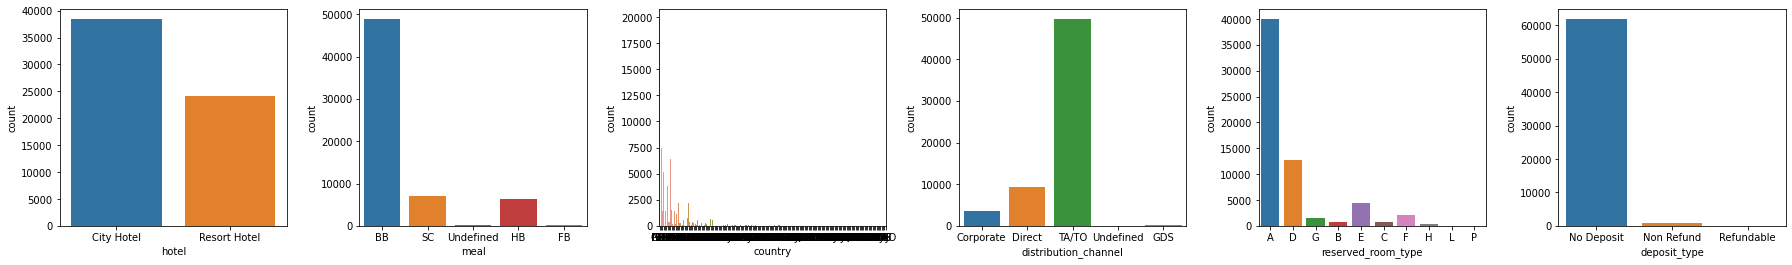

In [14]:
plt.figure(figsize=(25, 25))
for i in range(0, len(categorical)):
    plt.subplot(7, len(categorical), i+1)
    sns.countplot(Train[categorical[i]])
    plt.tight_layout()

###  EDA for Numerical 

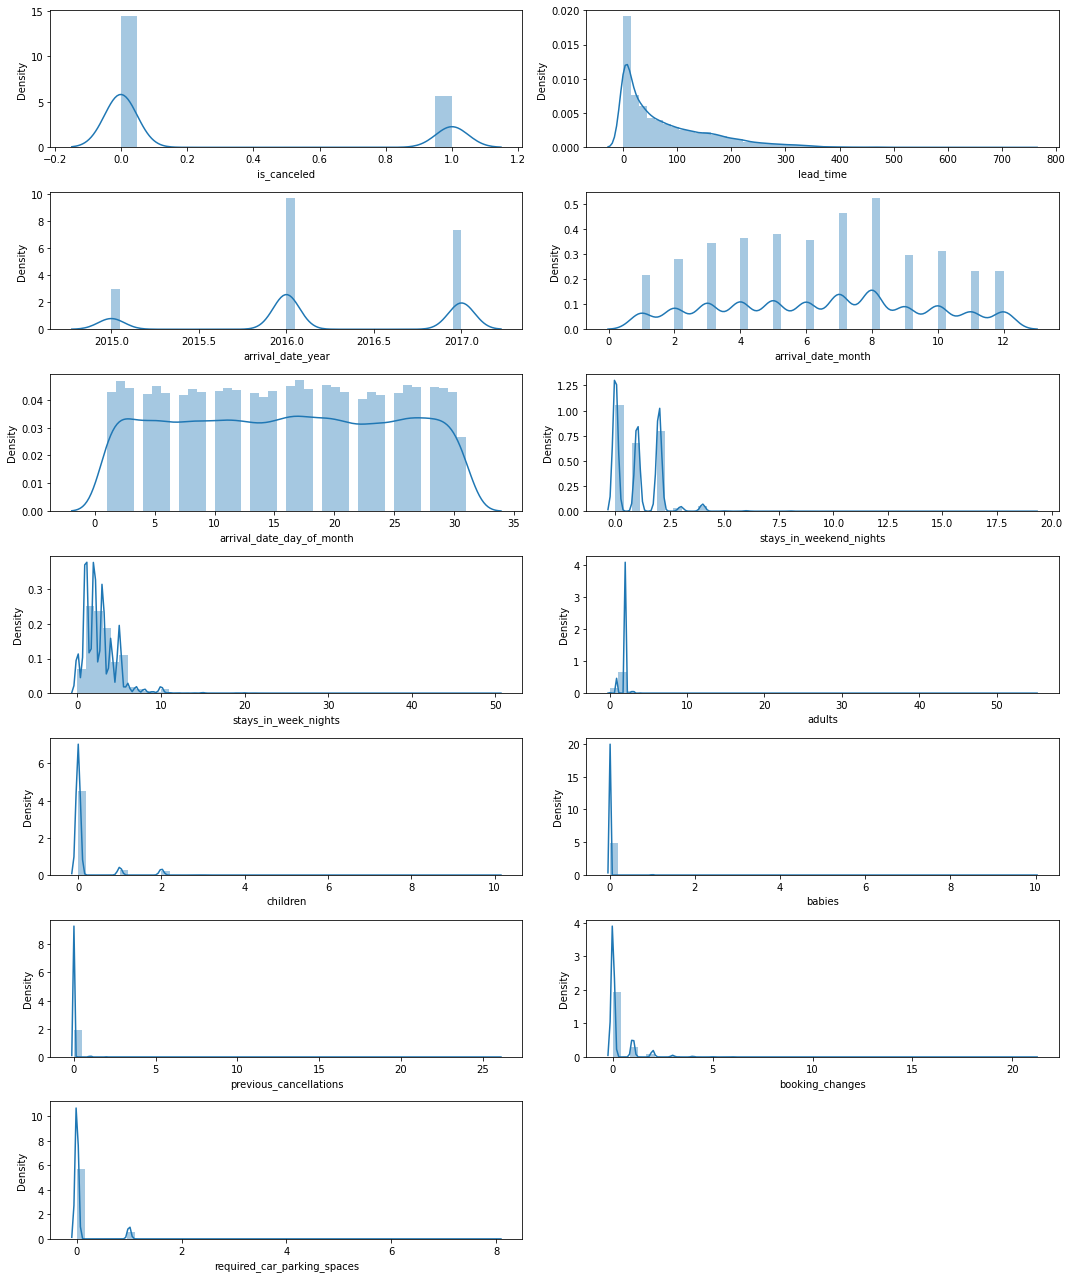

In [15]:
plt.figure(figsize=(15, 25))
for i in range(0, len(numerical)):
    plt.subplot(10, int(len(numerical)/5), i+1)
    sns.distplot(Train[numerical[i]])
    plt.tight_layout()

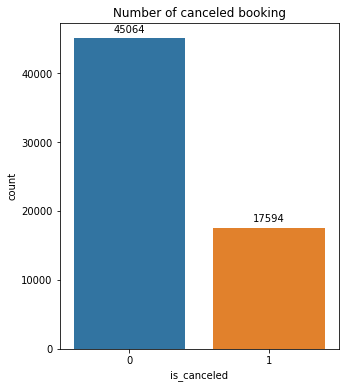

In [16]:
plt.figure(figsize=(5, 6))
cancel_ax = sns.countplot(Train['is_canceled'])

for p in cancel_ax.patches:
    cancel_ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.title("Number of canceled booking")
plt.show()

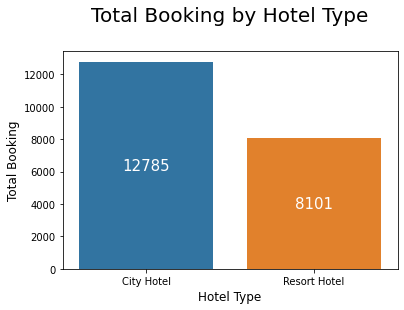

In [17]:
hotel_ax2 = sns.countplot(Test['hotel'])
for p in hotel_ax2.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    hotel_ax2.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='white',
            fontsize=15)

plt.title('Total Booking by Hotel Type', fontsize=20, pad=30)    
plt.xlabel('Hotel Type', fontsize=12)
plt.ylabel('Total Booking', fontsize=12)
plt.show()

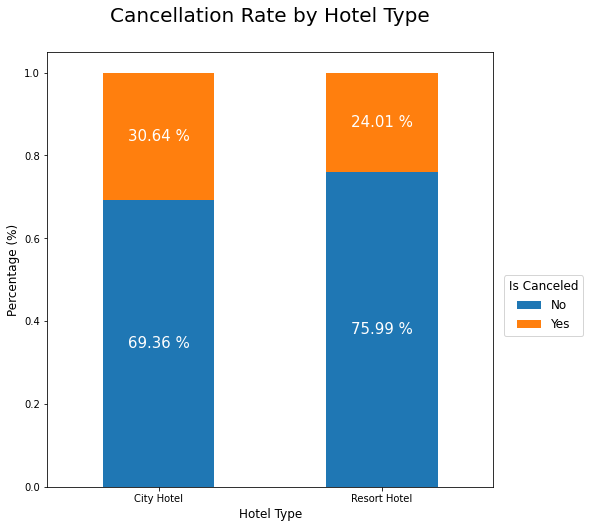

In [18]:
hotel_ax = pd.crosstab(Train['hotel'], Train['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(8,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])
    
for p in hotel_ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    hotel_ax.text(x+width/2, 
            y+height/2, 
            '{:.2f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='white', fontsize=15)
    
plt.title('Cancellation Rate by Hotel Type', fontsize=20, pad=30)    
plt.xticks(rotation=360)
plt.xlabel('Hotel Type', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

### Multivariate Analysis

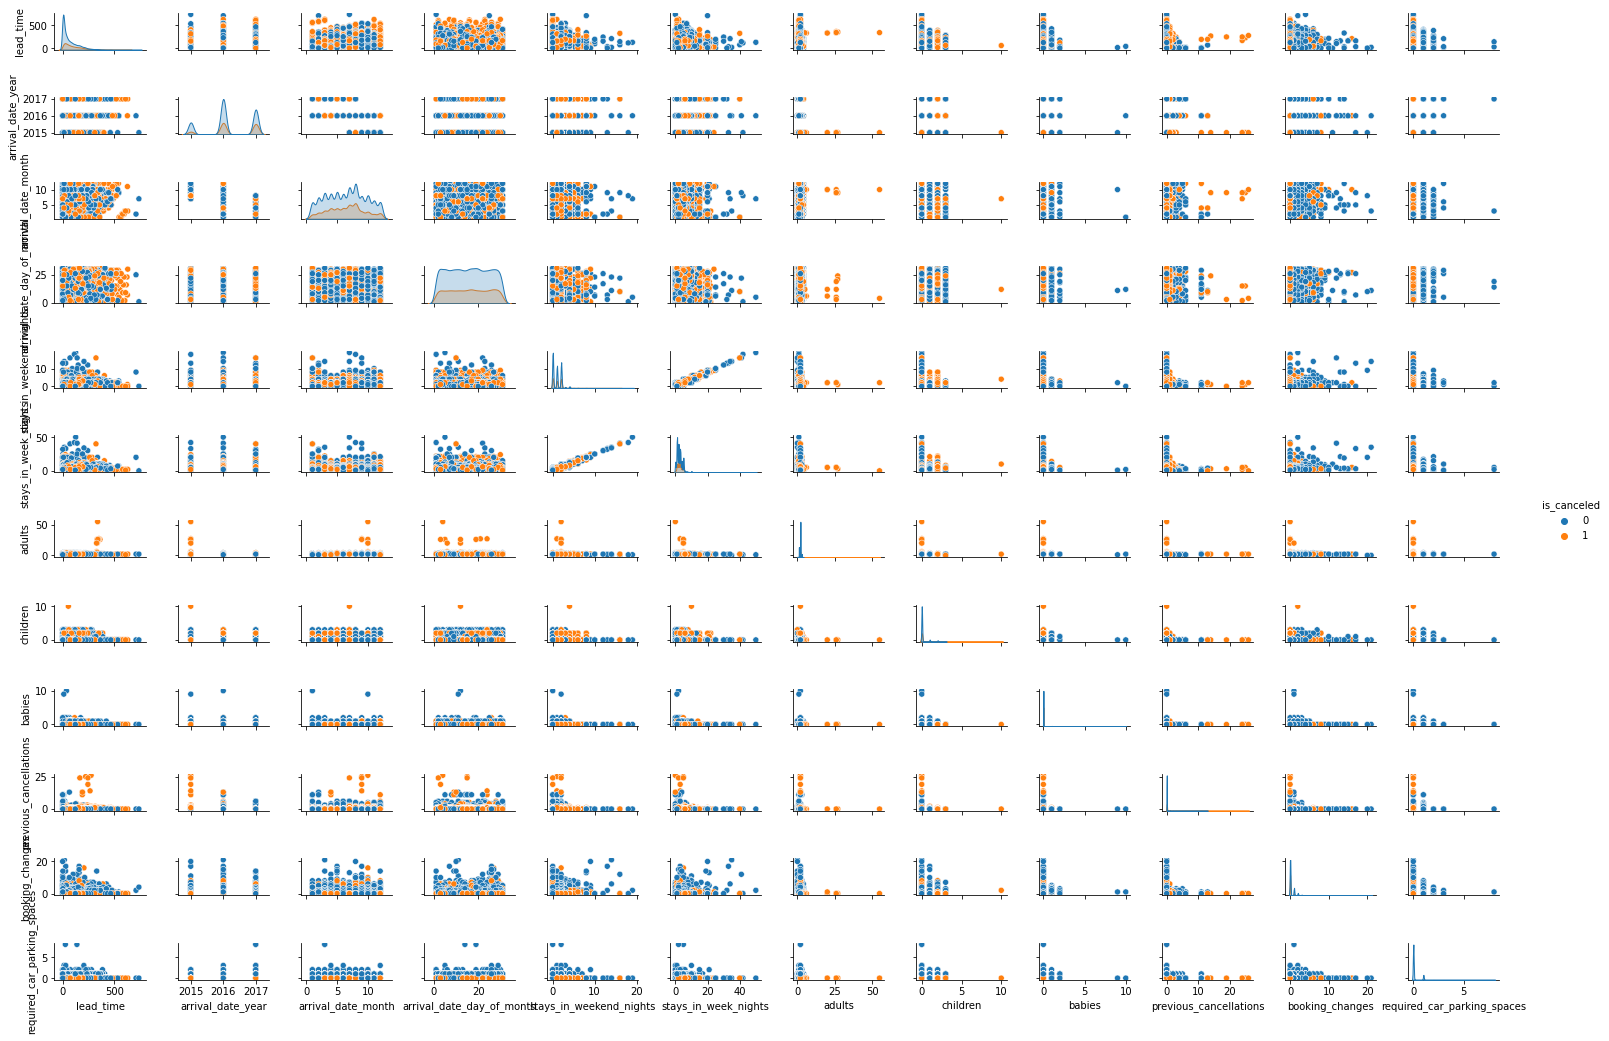

In [19]:
ax = sns.pairplot(Train, height=1.2, aspect=1.5,hue='is_canceled')

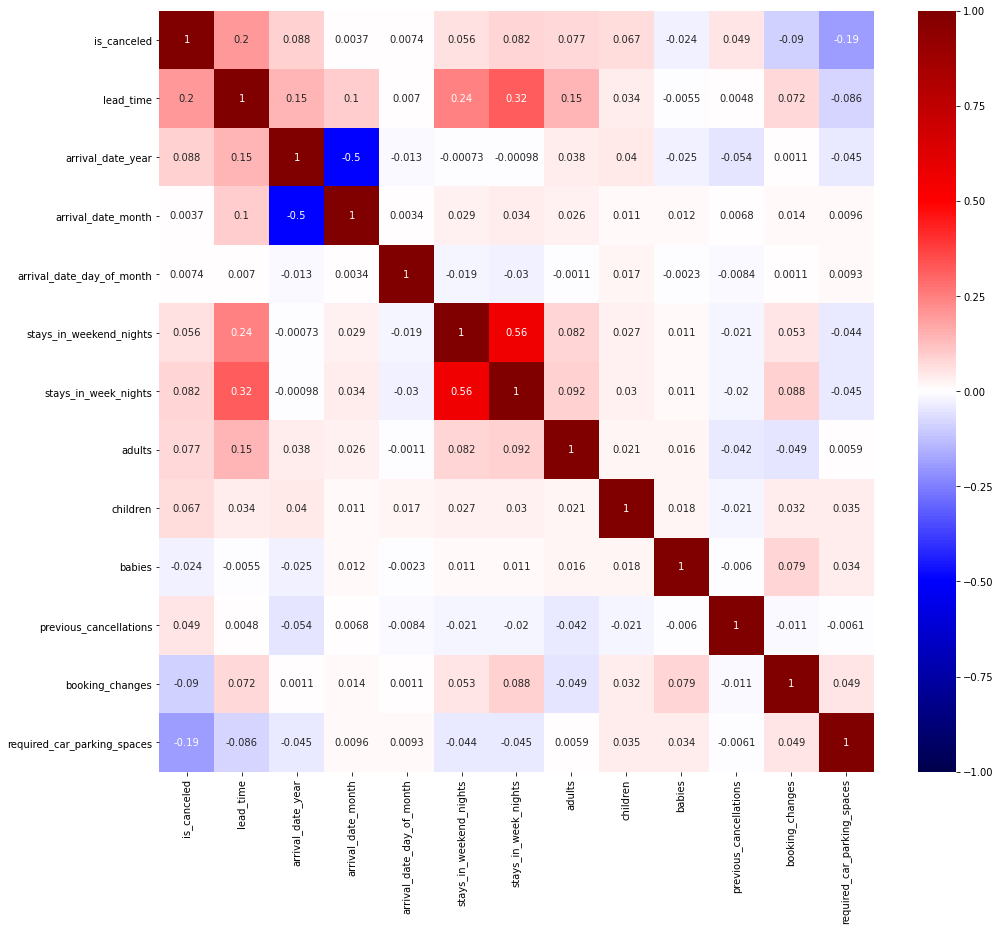

In [20]:
plt.figure(figsize=(16,14))
sns.heatmap(Train.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);
plt.savefig('heatmap.png')
plt.show()

In [21]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62658 entries, 78298 to 118925
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   hotel                        62658 non-null  object
 1   is_canceled                  62658 non-null  int64 
 2   lead_time                    62658 non-null  int64 
 3   arrival_date_year            62658 non-null  int64 
 4   arrival_date_month           62658 non-null  int64 
 5   arrival_date_day_of_month    62658 non-null  int64 
 6   stays_in_weekend_nights      62658 non-null  int64 
 7   stays_in_week_nights         62658 non-null  int64 
 8   adults                       62658 non-null  int64 
 9   children                     62658 non-null  int64 
 10  babies                       62658 non-null  int64 
 11  meal                         62658 non-null  object
 12  country                      62658 non-null  object
 13  distribution_channel      

## Models

In [67]:
def LogisticClassfication(X_train,y_train,X_test,y_test):
    LR = LogisticRegression(max_iter = 1000, random_state = 42)
    LR.fit(X_train,y_train)
    
    print("Train Scores:")
    preds = LR.predict(X_train)
    mdl_score(y_train,preds)
    
    print("-----------------------------------------------")
    print("\nValidation scores:")
    preds_val = LR.predict(X_test)
    mdl_score(y_test,preds_val)
    
    show_cmatrix(y_test,preds_val)
    return LR

    
    
    
    
def DecisionTree(X_train,y_train,X_test,y_test):
    DT = DecisionTreeClassifier()
    DT.fit(X_train,y_train)
  
    print("Train Scores:")
    preds = DT.predict(X_train)
    mdl_score(y_train,preds)
    
    print("-----------------------------------------------")
    print("\nValidation scores:")
    preds_val = DT.predict(X_test)
    mdl_score(y_test,preds_val)
    return DT
    
    
    
    
def RandomForest(X_train,y_train,X_test,y_test):
    RF = RandomForestClassifier()
    RF.fit(X_train,y_train)
    
    print("Train Scores:")
    preds = RF.predict(X_train)
    mdl_score(y_train,preds)
    
    print("-----------------------------------------------")
    print("\nValidation scores:")
    preds_val = RF.predict(X_test)
    mdl_score(y_test,preds_val)
    return RF
    
    
def Boost(X_train,y_train,X_test,y_test):
    xg_model = XGBClassifier(verbosity = 0)
    xg_model.fit(X_train, y_train) 

    print("Train Scores:")
    preds = xg_model.predict(X_train)
    mdl_score(y_train,preds)
    
    print("-----------------------------------------------")
    print("\nValidation scores:")
    preds_val = xg_model.predict(X_test)
    mdl_score(y_test,preds_val)
    

    
def SVM(X_train,y_train,X_test,y_test):
    svm_clf = svm.SVC(kernel='linear')
    svm_clf.fit(X_train,y_train)
    
    print("Train Scores:")
    preds = svm_clf.predict(X_train)
    mdl_score(y_train,preds)
    
    print("-----------------------------------------------")
    print("\nValidation scores:")
    preds_val = svm_clf.predict(X_test)
    mdl_score(y_test,preds_val)
    return svm_clf

def GridSearch(X_train,y_train,X_test,y_test):
    lr=LogisticRegression()
    grid_values = {'penalty': ['l2','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]} 
    model_lr = GridSearchCV(lr, param_grid=grid_values,scoring = 'recall')
    model_lr.fit(X_train, y_train)
    
    print("Train Scores:")
    preds = model_lr.predict(X_test)
    mdl_score(y_train,preds)
    
    print("-----------------------------------------------")
    print("\nValidation scores:")
    preds_val = model_lr.predict(X_test)
    mdl_score(y_test,preds_val)
    return model_lr


############## A function to score the model #################
def mdl_score(actual,preds, bta = 2): 
    print("The accuarcy score is",accuracy_score(actual, preds))
    print("The f1 score is",f1_score(actual, preds))
    print("The precision score is",precision_score(actual, preds))
    print("The recall score is",recall_score(actual, preds))
    f_bta = fbeta_score(actual, preds, beta=bta)
    print("The fbeta of", bta,"score is", f_bta)
    return f_bta


def show_cmatrix(ytest, pred):
    # Creating confusion matrix 
    cm = confusion_matrix(ytest, pred)

    # Putting the matrix a dataframe form  
    cm_df = pd.DataFrame(cm, index=['Actually Not Canceled', 'Actually Canceled'],
                 columns=['Predicted Not Canceled', 'Predicted Canceled'])
    
    # visualizing the confusion matrix
    sns.set(font_scale=1.2)
    plt.figure(figsize=(10,4))
        
    sns.heatmap(cm, annot=True, fmt='g', cmap="Blues",xticklabels=cm_df.columns, yticklabels=cm_df.index, annot_kws={"size": 20})
    plt.title("Confusion Matrix", size=20)
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class');

In [68]:
def is_not_outlier(s):
    lower_limit = s.mean() - (s.std() * 3)
    upper_limit = s.mean() + (s.std() * 3)
    return s.between(lower_limit, upper_limit)

### Baseline model

In [82]:
Trainbasse = Train.loc[:, (Train.dtypes == int) | (Train.dtypes == float)]
Testbasse = Test.loc[:, (Test.dtypes == int) | (Test.dtypes == float)]


In [83]:
X_train=Trainbasse.drop('is_canceled', axis = 1)
y_train=Trainbasse.is_canceled

X_Test=Testbasse.drop('is_canceled', axis = 1)
y_Test=Testbasse.is_canceled

Train Scores:
The accuarcy score is 0.6947242634741239
The f1 score is 0.45704637997815073
The precision score is 0.6696350619870788
The recall score is 0.3469123145579544
The fbeta of 2 score is 0.3839171900131476
-----------------------------------------------

Validation scores:
The accuarcy score is 0.6939828464218708
The f1 score is 0.45920663114268795
The precision score is 0.665180102915952
The recall score is 0.35063291139240504
The fbeta of 2 score is 0.3872578390253645


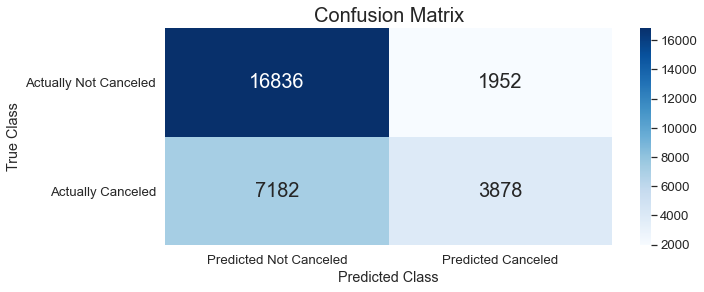

In [84]:
baseline=LogisticClassfication(X_train,y_train,X_Test,y_Test)

In [85]:
Train=encode_cat(Train)
Test=encode_cat(Test)

X_train1=Train.drop('is_canceled', axis = 1)
y_train1=Train.is_canceled

X_Test1=Test.drop('is_canceled', axis = 1)
y_Test1=Test.is_canceled



Train Scores:
The accuarcy score is 0.7684979393993544
The f1 score is 0.5739888194672805
The precision score is 0.9011357769747032
The recall score is 0.42110977080820267
The fbeta of 2 score is 0.4713236485391802
-----------------------------------------------

Validation scores:
The accuarcy score is 0.7692977753953364
The f1 score is 0.5757239679605668
The precision score is 0.9036750483558994
The recall score is 0.4224231464737794
The fbeta of 2 score is 0.47277878971868037


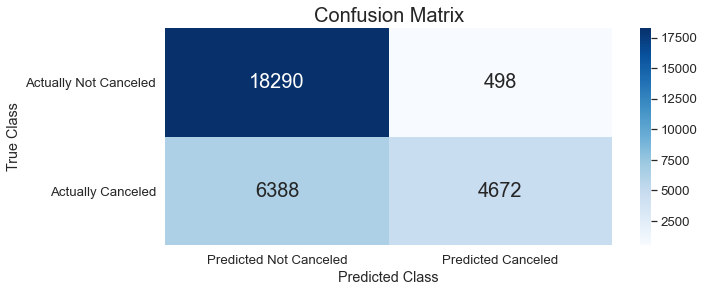

In [86]:
model2=LogisticClassfication(X_train1,y_train1,X_Test1,y_Test1)

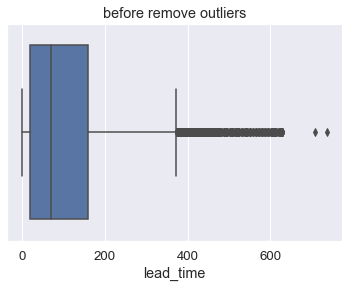

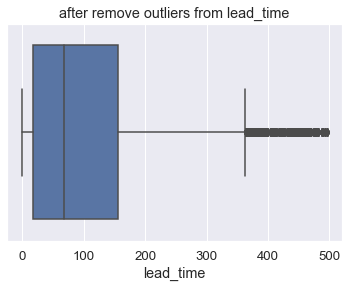

In [87]:

sns.boxplot(x=Train["lead_time"])
plt.title("before remove outliers")
plt.show()

Train = Train[Train.groupby("is_canceled")['lead_time'].apply(is_not_outlier)]
sns.boxplot(x=Train["lead_time"])
plt.title("after remove outliers from lead_time")
plt.show()

Train Scores:
The accuarcy score is 0.7679248486220361
The f1 score is 0.5824254149271968
The precision score is 0.8805418719211823
The recall score is 0.4351133424615853
The fbeta of 2 score is 0.48408937034529453
-----------------------------------------------

Validation scores:
The accuarcy score is 0.7661819887429644
The f1 score is 0.5831192879756287
The precision score is 0.8591797218799507
The recall score is 0.4413200723327306
The fbeta of 2 score is 0.4888724184211054


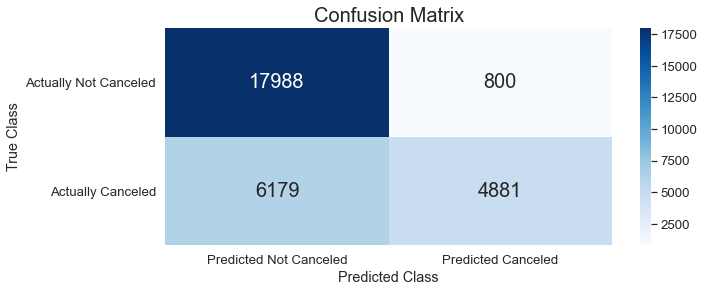

In [88]:
X_train3=Train.drop('is_canceled', axis = 1)
y_train3=Train.is_canceled

model4=LogisticClassfication(X_train3,y_train3,X_Test1,y_Test1)

Train Scores:
The accuarcy score is 0.7690226925471111
The f1 score is 0.5848657445077299
The precision score is 0.8822338140533906
The recall score is 0.4374258329529895
The fbeta of 2 score is 0.48648099895096614
-----------------------------------------------

Validation scores:
The accuarcy score is 0.7666510318949343
The f1 score is 0.5844024106450265
The precision score is 0.8592735567643446
The recall score is 0.44276672694394215
The fbeta of 2 score is 0.490298163759787


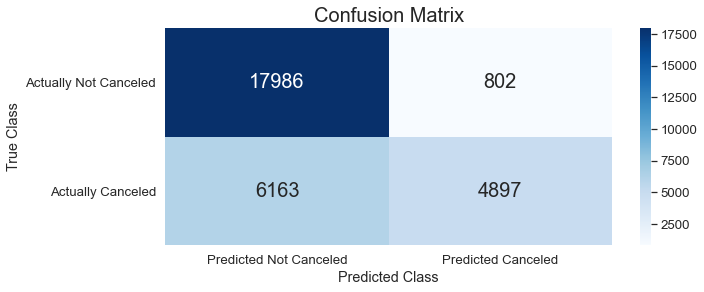

In [89]:
X_train4=Train.drop('is_canceled', axis = 1)
y_train4=Train.is_canceled

X_Test4=Test.drop('is_canceled', axis = 1)
y_Test4=Test.is_canceled


X_train4['kids'] = X_train4['children'] + X_train4['babies']
X_train4['total_guests'] = X_train4['adults'] + X_train4['children'] + X_train4['babies']
X_train4['total_stays'] = X_train4['stays_in_weekend_nights'] + X_train4['stays_in_week_nights']

X_Test4['kids'] = X_Test4['children'] + X_Test4['babies']
X_Test4['total_guests'] = X_Test4['adults'] + X_Test4['children'] + X_Test4['babies']
X_Test4['total_stays'] = X_Test4['stays_in_weekend_nights'] + X_Test4['stays_in_week_nights']

X_Test4.drop(['children','babies',"adults","stays_in_weekend_nights","stays_in_week_nights"], axis=1,inplace=True)
X_train4.drop(['children','babies',"adults","stays_in_weekend_nights","stays_in_week_nights"], axis=1,inplace=True)



model4=LogisticClassfication(X_train4,y_train4,X_Test4,y_Test4)

Train Scores:
The accuarcy score is 0.7130473959271941
The f1 score is 0.6741430471707766
The precision score is 0.779876893939394
The recall score is 0.593656514687331
The fbeta of 2 score is 0.6234292202876608
-----------------------------------------------

Validation scores:
The accuarcy score is 0.7375368533905119
The f1 score is 0.6278738362150864
The precision score is 0.6614291433146517
The recall score is 0.5975587703435805
The fbeta of 2 score is 0.6093265968431922


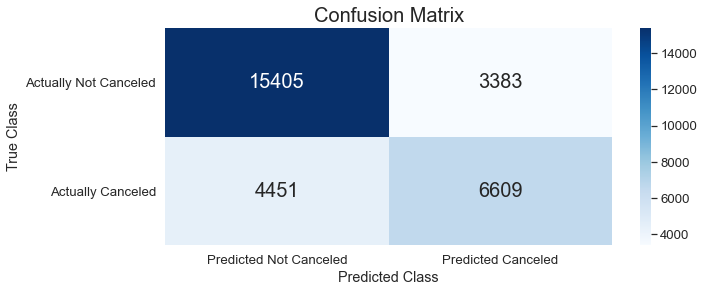

In [90]:
rusO = RandomOverSampler() 
# resampling X, y
X_rusO, y_rusO = rusO.fit_resample(X_train4, y_train4)

model5=LogisticClassfication(X_rusO,y_rusO,X_Test4,y_Test4)

Train Scores:
The accuarcy score is 0.7129773315076829
The f1 score is 0.6747241379310345
The precision score is 0.7784762283668192
The recall score is 0.5953750190171916
The fbeta of 2 score is 0.6247645199399726
-----------------------------------------------

Validation scores:
The accuarcy score is 0.7367327794157063
The f1 score is 0.6270172773875071
The precision score is 0.6599720223820943
The recall score is 0.5971971066907775
The fbeta of 2 score is 0.6087782038047485


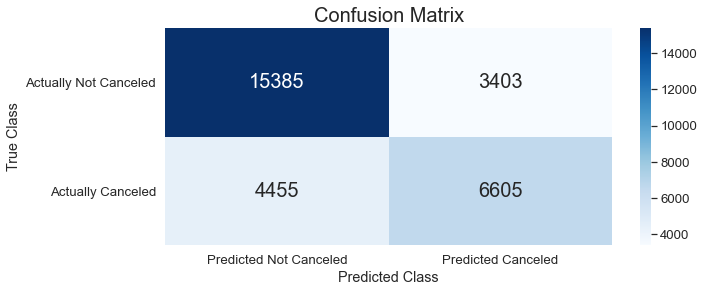

In [93]:
rus = RandomUnderSampler() 
# resampling X, y
X_rus, y_rus = rus.fit_resample(X_train4, y_train4)

model4=LogisticClassfication(X_rus,y_rus,X_Test4,y_Test4)

Train Scores:
The accuarcy score is 0.7616935151736229
The f1 score is 0.5970553123756466
The precision score is 0.8625467088243748
The recall score is 0.45653430701354025
The fbeta of 2 score is 0.5039803835947735
-----------------------------------------------

Validation scores:
The accuarcy score is 0.7653109086035915
The f1 score is 0.593512447049266
The precision score is 0.8284464603920298
The recall score is 0.4623869801084991
The fbeta of 2 score is 0.5072104417511356


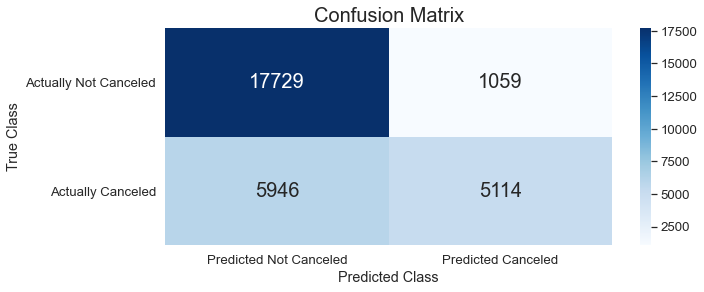

In [94]:
from imblearn.under_sampling import TomekLinks

Tomek = TomekLinks(sampling_strategy = 'majority')
X_res, y_res = Tomek.fit_resample(X_train4, y_train4)

model5=LogisticClassfication(X_res,y_res,X_Test4,y_Test4)

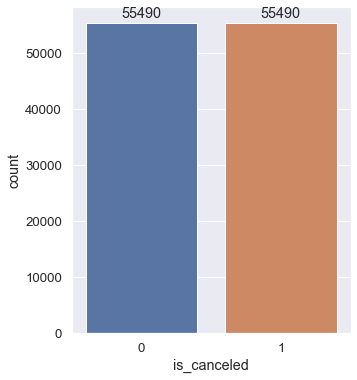

In [95]:
plt.figure(figsize=(5, 6))
cancel_ax = sns.countplot(y_rusO)

for p in cancel_ax.patches:
    cancel_ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.show()

Train Scores:
The accuarcy score is 0.7116958010452333
The f1 score is 0.6789484246437889
The precision score is 0.7659497396422912
The recall score is 0.6096954406199315
The fbeta of 2 score is 0.6356292037725925
-----------------------------------------------

Validation scores:
The accuarcy score is 0.7313052800857679
The f1 score is 0.6274272972219641
The precision score is 0.6452321803936556
The recall score is 0.6105786618444846
The fbeta of 2 score is 0.6172083500895698


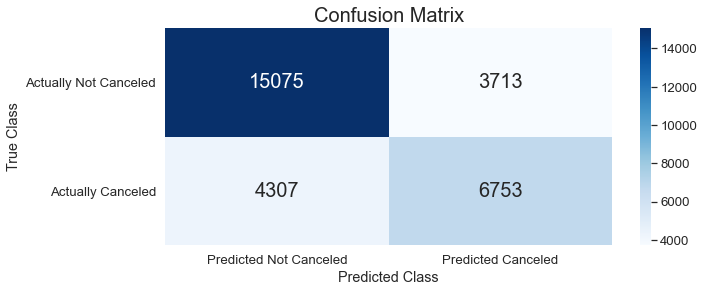

In [96]:
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_train4, y_train4)
model5=LogisticClassfication(X_smote,y_smote,X_Test4,y_Test4)

In [98]:
model6=DecisionTree(X_smote,y_smote,X_Test4,y_Test4)

Train Scores:
The accuarcy score is 0.9936475040547846
The f1 score is 0.9936406851823455
The precision score is 0.9947084213758104
The recall score is 0.9925752387817625
The fbeta of 2 score is 0.993001143038463
-----------------------------------------------

Validation scores:
The accuarcy score is 0.7413227016885553
The f1 score is 0.6309449835093924
The precision score is 0.6693033160937024
The recall score is 0.596745027124774
The fbeta of 2 score is 0.6099702408458254


In [99]:
model7=RandomForest(X_smote,y_smote,X_Test4,y_Test4)

Train Scores:
The accuarcy score is 0.9936384934222382
The f1 score is 0.9936398688335556
The precision score is 0.9934250819613071
The recall score is 0.993854748603352
The fbeta of 2 score is 0.9937687855438709
-----------------------------------------------

Validation scores:
The accuarcy score is 0.7876239614044492
The f1 score is 0.663374223355106
The precision score is 0.8037575601595677
The recall score is 0.5647377938517179
The fbeta of 2 score is 0.6004499048278249


In [100]:
model8=Boost(X_smote,y_smote,X_Test4,y_Test4)

Train Scores:
The accuarcy score is 0.807749143989908
The f1 score is 0.7886520326491799
The precision score is 0.875632396287009
The recall score is 0.7173905208145612
The fbeta of 2 score is 0.7442917934949257
-----------------------------------------------

Validation scores:
The accuarcy score is 0.7617260787992496
The f1 score is 0.5779729408972228
The precision score is 0.8408149171270718
The recall score is 0.4403254972875226
The fbeta of 2 score is 0.4866885193476176


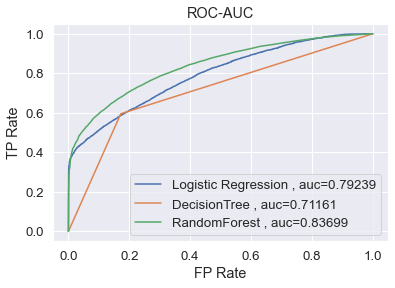

In [134]:
y_pred_proba = model5.predict_proba(X_Test4)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_Test4,  y_pred_proba)
auc = round(metrics.roc_auc_score(y_Test4, y_pred_proba),5)
plt.plot(fpr,tpr,label="Logistic Regression , auc="+str(auc))


y_pred_proba = model6.predict_proba(X_Test4)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_Test4,  y_pred_proba)
auc = round(metrics.roc_auc_score(y_Test4, y_pred_proba),5)
plt.plot(fpr,tpr,label="DecisionTree , auc="+str(auc))

y_pred_proba = model7.predict_proba(X_Test4)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_Test4,  y_pred_proba)
auc = round(metrics.roc_auc_score(y_Test4, y_pred_proba),5)
plt.plot(fpr,tpr,label="RandomForest , auc="+str(auc))

#y_pred_proba1 = model8.predict_proba(X_Test4)[::,1]
#fpr, tpr, _ = metrics.roc_curve(y_Test4,y_pred_proba1)
#auc = metrics.roc_auc_score(y_Test4, y_pred_proba1)
#plt.plot(fpr,tpr,label="Boost , auc="+str(auc))



plt.legend(loc=4)
plt.ylabel('TP Rate')
plt.xlabel('FP Rate')
plt.title('ROC-AUC')
plt.savefig('ROC_AUC.png')
plt.show()